In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble.forest import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
nyse = pd.read_csv("/Users/apple/Desktop/fundamentals.csv", encoding = "ISO-8859-1")

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import utils
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [5]:
nyse.head()

,Sl No,Ticker Symbol,For Year,Accounts Payable,Accounts Receivable,Addl income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012.0,3.068000e+09,-222000000,-1961000000,23,-1888000000,4.695000e+09,53.0,...,2.351000e+10,7.072000e+09,9011000000,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08
1,1,AAL,2013.0,4.975000e+09,-93000000,-2723000000,67,-3114000000,1.059200e+10,75.0,...,4.227800e+10,1.432300e+10,13806000000,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08
2,2,AAL,2014.0,4.668000e+09,-160000000,-150000000,143,-5311000000,1.513500e+10,60.0,...,4.322500e+10,1.175000e+10,13404000000,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,4.02,7.169154e+08
3,3,AAL,2015.0,5.102000e+09,352000000,-708000000,135,-6151000000,1.159100e+10,51.0,...,4.841500e+10,9.985000e+09,13605000000,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,11.39,6.681299e+08
4,4,AAP,2012.0,2.409453e+09,-89482000,600000,32,-271182000,5.202150e+08,23.0,...,4.613814e+09,3.184200e+09,2559638000,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,5.29,7.328355e+07


In [6]:
nyse.shape

(1781, 77)

In [7]:
nyse.dropna(inplace = True) 
nyse.shape

(1299, 77)

In [8]:
name = nyse ['Ticker Symbol']
name_df = pd.DataFrame(name)
name_df.head()
name_df.nunique

<bound method DataFrame.nunique of      Ticker Symbol
0              AAL
1              AAL
2              AAL
3              AAL
4              AAP
...            ...
1771           ZBH
1772           ZBH
1777           ZTS
1778           ZTS
1779           ZTS

[1299 rows x 1 columns]>

In [9]:
nyse.drop(nyse.columns[[0,1]], axis = 1, inplace = True)

In [10]:
ss = MinMaxScaler()
#ss = StandardScaler()
nyse_scale =  pd.DataFrame(ss.fit_transform(nyse),columns=nyse.columns)
nyse_scale.head()

,For Year,Accounts Payable,Accounts Receivable,Addl income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,0.995006,0.049440,0.559045,0.139602,0.003973,0.950296,0.058984,0.050913,0.024846,0.676642,...,0.055752,0.049531,0.107662,0.028076,0.088141,0.039315,0.050007,0.998404,0.499596,0.186142
1,0.996255,0.080909,0.570621,0.098938,0.011574,0.918020,0.123201,0.072046,0.040633,0.676642,...,0.102450,0.101378,0.166015,0.056146,0.160050,0.102450,0.053897,1.000000,0.448827,0.168828
2,0.997503,0.075843,0.564609,0.236245,0.024702,0.860182,0.172673,0.057637,0.033029,0.676642,...,0.104807,0.082980,0.161123,0.081525,0.146450,0.104807,0.086666,1.000000,0.586036,0.224591
3,0.998752,0.083005,0.610553,0.206468,0.023320,0.838068,0.134080,0.048991,0.020269,0.676642,...,0.117720,0.070360,0.163569,0.100826,0.152083,0.117720,0.083247,1.000000,0.652260,0.219680
4,0.995006,0.038573,0.570937,0.244282,0.005528,0.992861,0.013522,0.022094,0.011173,0.644976,...,0.008734,0.021733,0.029151,0.077197,0.011335,0.008734,0.011587,0.999882,0.597448,0.159794


In [11]:
EPS = nyse_scale.filter(['Earnings Per Share'], axis = 1)
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(EPS)
EPS = pd.DataFrame(training_scores_encoded)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
nyse_scale.drop(['Earnings Per Share'], axis = 1)

,For Year,Accounts Payable,Accounts Receivable,Addl income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Estimated Shares Outstanding
0,0.995006,0.049440,0.559045,0.139602,0.003973,0.950296,0.058984,0.050913,0.024846,0.676642,...,0.031888,0.055752,0.049531,0.107662,0.028076,0.088141,0.039315,0.050007,0.998404,0.186142
1,0.996255,0.080909,0.570621,0.098938,0.011574,0.918020,0.123201,0.072046,0.040633,0.676642,...,0.075804,0.102450,0.101378,0.166015,0.056146,0.160050,0.102450,0.053897,1.000000,0.168828
2,0.997503,0.075843,0.564609,0.236245,0.024702,0.860182,0.172673,0.057637,0.033029,0.676642,...,0.058963,0.104807,0.082980,0.161123,0.081525,0.146450,0.104807,0.086666,1.000000,0.224591
3,0.998752,0.083005,0.610553,0.206468,0.023320,0.838068,0.134080,0.048991,0.020269,0.676642,...,0.054804,0.117720,0.070360,0.163569,0.100826,0.152083,0.117720,0.083247,1.000000,0.219680
4,0.995006,0.038573,0.570937,0.244282,0.005528,0.992861,0.013522,0.022094,0.011173,0.644976,...,0.000000,0.008734,0.021733,0.029151,0.077197,0.011335,0.008734,0.011587,0.999882,0.159794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,0.997503,0.002533,0.575341,0.242393,0.001900,0.990989,0.055017,0.159462,0.020238,0.656618,...,0.005724,0.021285,0.029806,0.010463,0.105712,0.010280,0.021285,0.008432,0.973114,0.169438
1295,0.998752,0.005941,0.573932,0.242782,0.000173,0.988572,0.097102,0.096061,0.027262,0.651655,...,0.001538,0.064982,0.040886,0.017690,0.123539,0.061121,0.064982,0.011160,0.972482,0.171389
1296,0.996255,0.021601,0.570083,0.244730,0.009328,0.995156,0.017418,0.041306,0.011396,0.654988,...,0.000000,0.013572,0.022968,0.015221,0.075751,0.019252,0.013572,0.008200,1.000000,0.202653
1297,0.997503,0.016486,0.585158,0.243876,0.007601,0.995261,0.018289,0.077810,0.016477,0.663260,...,0.000000,0.013646,0.023740,0.011217,0.077733,0.018033,0.013646,0.008662,1.000000,0.203013


In [13]:
rf_exp = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state=100))
rf_exp.fit(nyse_scale,EPS )

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=100, verbose=0,
   

In [14]:
rf_exp.get_support()

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True,  True])

In [15]:
selected_feat= nyse_scale.columns[(rf_exp.get_support())]
len(selected_feat)

34

In [16]:
print(nyse_scale.columns[rf_exp.get_support()])

Index(['Accounts Receivable', 'Addl income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Current Ratio', 'Depreciation',
       'Effect of Exchange Rate', 'Fixed Assets', 'Income Tax', 'Investments',
       'Liabilities', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flows-Financing', 'Net Income Adjustments', 'Other Assets',
       'Other Current Assets', 'Other Equity', 'Other Financing Activities',
       'Other Investing Activities', 'Other Operating Activities',
       'Pre-Tax ROE', 'Quick Ratio', 'Retained Earnings',
       'Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Earnings Per Share', 'Estimated Shares Outstanding'],
      dtype='object')


In [17]:
train_data = pd.DataFrame(nyse_scale.iloc[ :1200])
test_data =  pd.DataFrame(nyse_scale.iloc[ 1200:])
train_label = pd.DataFrame(name_df.iloc[ :1200])
test_label = pd.DataFrame(name_df.iloc[1200:])
train_EPS = pd.DataFrame(EPS.iloc[ :1200])
test_EPS = pd.DataFrame(EPS.iloc[1200:])

In [18]:
features_train = train_data.filter(['Accounts Receivable', 'Addl income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Current Ratio', 'Depreciation',
       'Effect of Exchange Rate', 'Fixed Assets', 'Income Tax', 'Investments',
       'Liabilities', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flows-Financing', 'Net Income Adjustments', 'Other Assets',
       'Other Current Assets', 'Other Equity', 'Other Financing Activities',
       'Other Investing Activities', 'Other Operating Activities',
       'Pre-Tax ROE', 'Quick Ratio', 'Retained Earnings',
       'Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Earnings Per Share', 'Estimated Shares Outstanding'], axis=1)
features_test = test_data.filter(['Accounts Receivable', 'Addl income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Current Ratio', 'Depreciation',
       'Effect of Exchange Rate', 'Fixed Assets', 'Income Tax', 'Investments',
       'Liabilities', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flows-Financing', 'Net Income Adjustments', 'Other Assets',
       'Other Current Assets', 'Other Equity', 'Other Financing Activities',
       'Other Investing Activities', 'Other Operating Activities',
       'Pre-Tax ROE', 'Quick Ratio', 'Retained Earnings',
       'Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Earnings Per Share', 'Estimated Shares Outstanding'], axis=1)
len(features_test)

99

In [19]:
rf_exp = RandomForestRegressor(n_estimators= 100, random_state=100)
rf_exp.fit(features_train,train_EPS)
r_sq = rf_exp.score(features_train,train_EPS)
print(r_sq)

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9999961443756096


In [20]:
predictions = rf_exp.predict(features_test)
print("predictions are - ", predictions, sep='\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(test_EPS, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_EPS, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_EPS, predictions)))

predictions are - 
[388.12 304.22 347.41  58.29  35.59  24.45  32.14  92.4  408.68 268.68
 436.68 527.97 413.16 577.16 552.66 142.11 263.69 276.72 285.1  263.3
 181.15 190.44 181.87 188.31 639.77 609.91 634.74  85.67 304.01 198.79
 174.08 112.12 314.01  50.13 486.1  474.3  490.12 451.78 316.11  43.64
 202.84 176.8  192.6  196.09 118.28 135.35 337.68 129.82 304.02 342.45
 425.03 496.17 471.31 583.4  583.02 225.71 413.33 558.77 532.18   4.89
 219.67 223.79 235.07 226.86 219.54 263.62 269.64 244.86 632.77 585.77
 595.46 395.32 252.6  250.85 258.87 211.37 132.2  135.15 126.85  98.89
 192.61 160.81 217.07 220.93 348.95 167.81 596.15  19.08 362.98 268.35
 264.08 315.9  431.62 446.07 425.94 124.16 141.77 155.33 116.01]
Mean Absolute Error: 0.5386868686868685
Mean Squared Error: 0.5798979797979789
Root Mean Squared Error: 0.7615103280967231


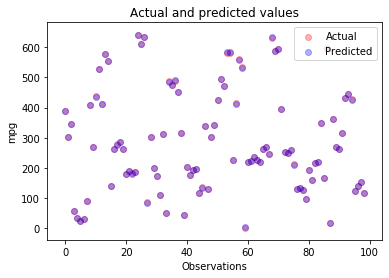

In [21]:
_, ax = plt.subplots()

ax.scatter(x = range(0, test_EPS.size), y=test_EPS, c = 'red', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [22]:
D_train = xgb.DMatrix(features_train, label=train_EPS)
D_test = xgb.DMatrix(features_test, label=test_EPS)
#xg_train.save_binary('train.buffer')
#xg_test.save_binary('train.buffer')

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

NameError: name 'xgb' is not defined

In [ ]:
model = xgb.train(param, D_train, steps)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(features_train,train_EPS)
xg_sq = xg_reg.score(features_train,train_EPS)
print(xg_sq)
preds = xg_reg.predict(features_test)
print("predictions are - ", preds, sep='\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(test_EPS, preds))
print('Mean Squared Error:', metrics.mean_squared_error(test_EPS, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_EPS, preds)))

_, axc = plt.subplots()

axc.scatter(x = range(0, test_EPS.size), y=test_EPS, c = 'red', label = 'Actual', alpha = 0.3)
axc.scatter(x = range(0, preds.size), y=preds, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()


In [ ]:
corr = features_train.corr()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(features_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(features_train.columns)
ax.set_yticklabels(features_train.columns)
plt.show()

In [ ]:
col_train = train_data.filter(['Accounts Receivable', 'Addl income/expense items',
       'Capital Expenditures', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Depreciation',
       'Effect of Exchange Rate', 'Fixed Assets', 'Income Tax', 'Investments',
       'Liabilities', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flows-Financing', 'Net Income Adjustments', 'Other Assets',
       'Other Current Assets', 'Other Equity', 'Other Financing Activities',
       'Other Investing Activities', 'Other Operating Activities',
       'Pre-Tax ROE', 'Quick Ratio', 'Retained Earnings',
       'Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Earnings Per Share', 'Estimated Shares Outstanding'], axis=1)
col_test = test_data.filter(['Accounts Receivable', 'Addl income/expense items',
       'Capital Expenditures', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Depreciation',
       'Effect of Exchange Rate', 'Fixed Assets', 'Income Tax', 'Investments',
       'Liabilities', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flows-Financing', 'Net Income Adjustments', 'Other Assets',
       'Other Current Assets', 'Other Equity', 'Other Financing Activities',
       'Other Investing Activities', 'Other Operating Activities',
       'Pre-Tax ROE', 'Quick Ratio', 'Retained Earnings',
       'Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Earnings Per Share', 'Estimated Shares Outstanding'], axis=1)


In [ ]:
train_EPS.shape

In [ ]:
rf_exp1 = RandomForestRegressor(n_estimators= 100, random_state=100)
rf_exp1.fit(col_train,train_EPS)
r_sq1 = rf_exp1.score(col_train,train_EPS)
print(r_sq1)
predictions1 = rf_exp1.predict(col_test)
print("predictions are - ", predictions1, sep='\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(test_EPS, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(test_EPS, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_EPS, predictions1)))

In [ ]:
_, axc = plt.subplots()

axc.scatter(x = range(0, test_EPS.size), y=test_EPS, c = 'red', label = 'Actual', alpha = 0.3)
axc.scatter(x = range(0, predictions1.size), y=predictions1, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [ ]:
col= train_data.filter(['Other Operating Items' , 'Pre-Tax Margin ',' Profit Margin','Operating Margin ','Long-Term Investments',
'Non-Recurring Items','Common Stocks','Depreciation','Accounts Payable','Cost of Revenue','Total Current Liabilities',
'Total Revenue','Other Liabilities','Net Receivables','Research and Development','Total Current Assets',
'Inventory','Deferred Liability Charges','Total Liabilities & Equity','Total Assets'] , axis=1)
col_t = test_data.filter(['Other Operating Items' , 'Pre-Tax Margin ',' Profit Margin','Operating Margin ','Long-Term Investments',
'Non-Recurring Items','Common Stocks','Depreciation','Accounts Payable','Cost of Revenue','Total Current Liabilities',
'Total Revenue','Other Liabilities','Net Receivables','Research and Development','Total Current Assets',
'Inventory','Deferred Liability Charges','Total Liabilities & Equity','Total Assets'] , axis=1)


In [ ]:
rf_exp2 = RandomForestRegressor(n_estimators= 100, random_state=100)
rf_exp2.fit(col,train_EPS)
r_sq2 = rf_exp2.score(col,train_EPS)
print(r_sq2)
predictions2 = rf_exp2.predict(col_t)
#print("predictions are - ", predictions1, sep='\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(test_EPS, predictions2))
print('Mean Squared Error:', metrics.mean_squared_error(test_EPS, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_EPS, predictions2)))

In [ ]:
_, axc = plt.subplots()

axc.scatter(x = range(0, test_EPS.size), y=test_EPS, c = 'red', label = 'Actual', alpha = 0.3)
axc.scatter(x = range(0, predictions2.size), y=predictions2, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [ ]:
conda install -c conda-forge fbprophet